In [3]:
pip install sklearn 

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [4]:
# importing naecesarry libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
df=pd.read_csv(r'basic iot network dataset.csv')

C:\Users\076\AppData\Local\Temp\ipykernel_11204\1558560585.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'basic iot network dataset.csv')


In [6]:
#Let's print the first 5 records of the data set
df.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ... ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                1               2             0   
1  125000.0003  ...                1               2             0   
2  200000.0051  ...                1               3             0   
3  166666.6608  ...                1               3             0   
4  100000.0025  ...                1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   

   attack_cat  label  
0      Normal      0  
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  

[5 rows x 45 columns]

In [7]:
#Let's print the last 5 records of the dataset 
df.tail()

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ... ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
82327  200000.005100  ...                1               2             0   
82328      24.410067  ...                1               1             0   
82329       0.000000  ...                1               1             0   
82330       0.000000  ...                1               1             0   
82331  111111.107200  ...                1               1             0   

       ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
82327           0                 0           2           1                0   
82328           0                 0           3           2                0   
82329           0                 0           1           1                1   
82330           0                 0           1           1                1   
82331           0                 0           1           1                0   

       attack_cat  label  
82327      Normal      0  
82328      Normal      0  
82329      Normal      0  
82330      Normal      0  
82331      Normal      0  

[5 rows x 45 columns]

In [8]:
#Let's print the column name
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpin', 'b', 'dtcpb',
       'dwtcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [9]:
# shape of the dataset
df.shape


(82332, 45)

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
82327    False
82328    False
82329    False
82330    False
82331    False
Length: 82332, dtype: bool

In [11]:

#Let's print the total number of duplicated value
df.duplicated().sum()

0

In [12]:
#Let's print the unique values in our dataset
df.nunique()

id                   82332
dur                  39888
proto                  131
service                 13
state                    7
spkts                  420
dpkts                  436
sbytes                4489
dbytes                4034
rate                 40616
sttl                    16
dttl                     8
sload                42873
dload                40614
sloss                  253
dloss                  311
sinpkt               39970
dinpkt               37617
sjit                 39944
djit                 38381
swin                    11
stcpin               39219
b                    39108
dtcpb                   14
dwtcprtt             26130
synack               24934
ackdat               24020
smean                 1282
dmean                 1222
trans_depth              8
response_body_len     1190
ct_srv_src              57
ct_state_ttl             7
ct_dst_ltm              50
ct_src_dport_ltm        50
ct_dst_sport_ltm        33
ct_dst_src_ltm          57
i

In [13]:
#Let's print the data types in our data
df.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                  object
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpin                 int64
b                      int64
dtcpb                  int64
dwtcprtt             float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [14]:
#descriptive statistics summary
df.describe

<bound method NDFrame.describe of           id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ... ct_dst_sport_ltm  ct_dst_sr

In [15]:
#Let's get the overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  object 
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [16]:
#Let's check the total number of null values present in our dataset 
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpin               0
b                    0
dtcpb                0
dwtcprtt             0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

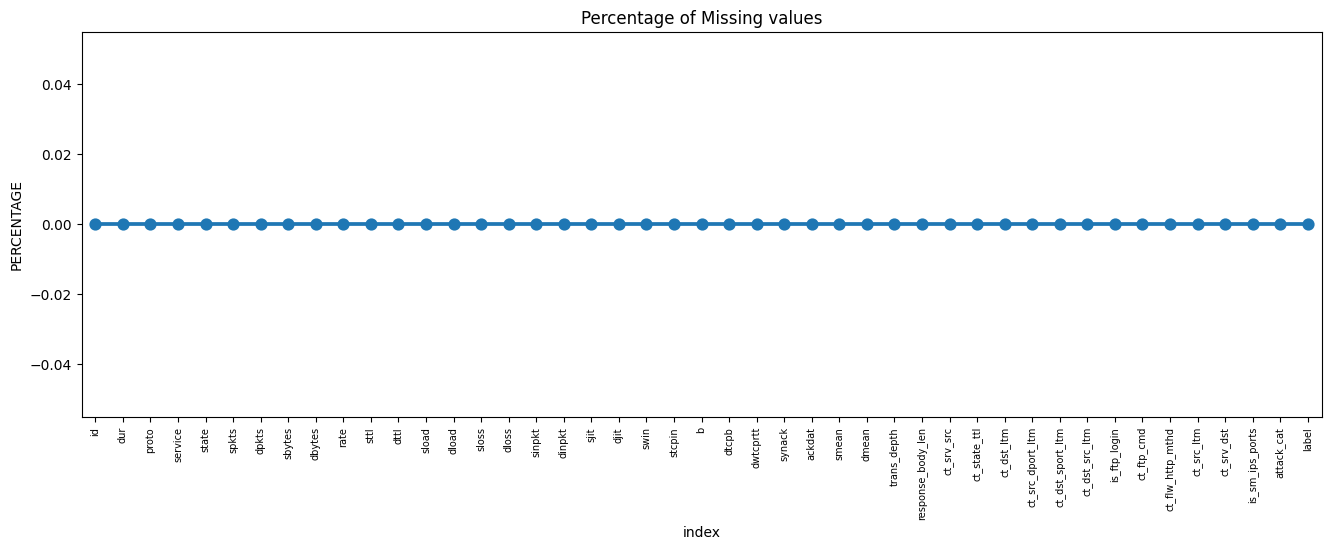

In [17]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

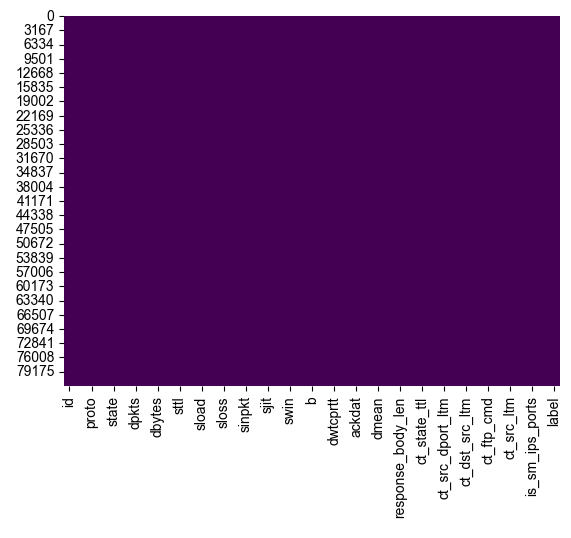

In [18]:

# Create heatmap with missing values in DataFrame highlighted
sns.heatmap(df.isnull(), cbar=False,cmap='viridis')
sns.set(rc={'figure.figsize':(10,5)})

# **BOXPLOT**

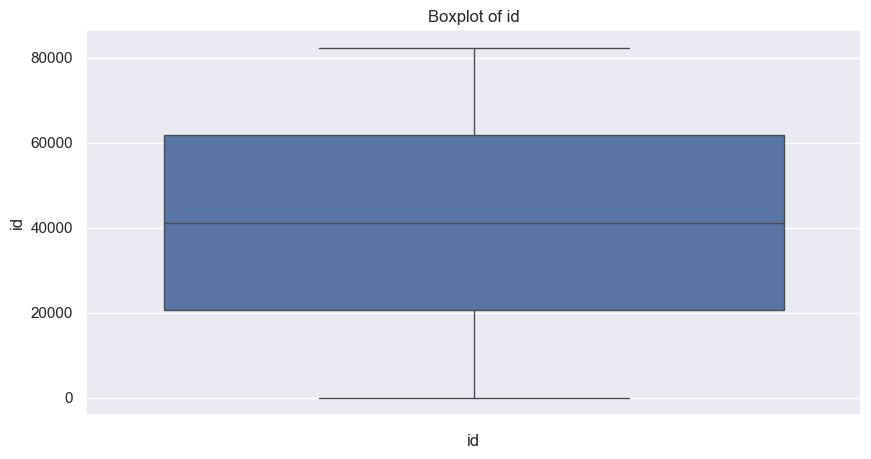

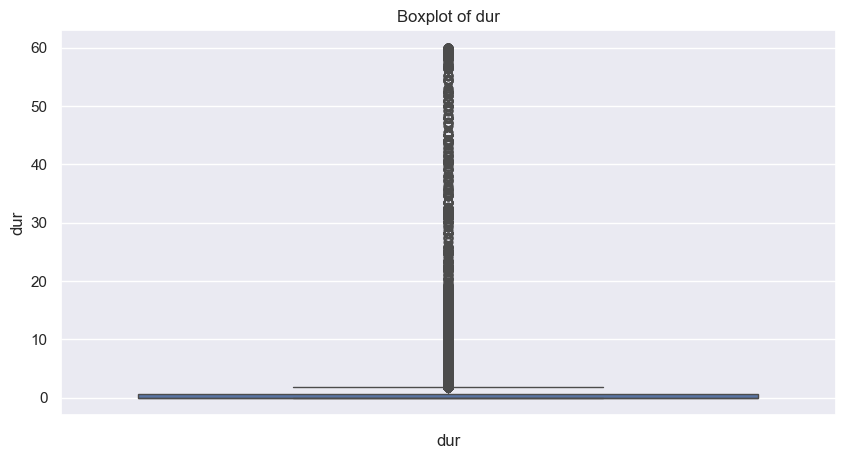

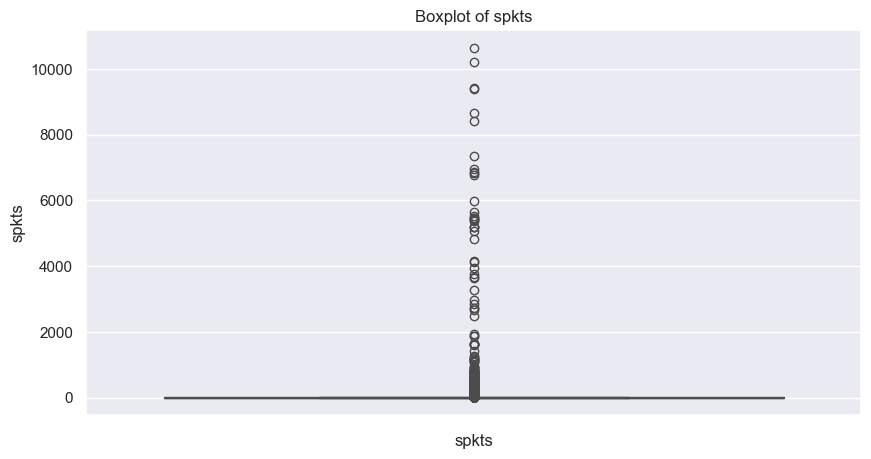

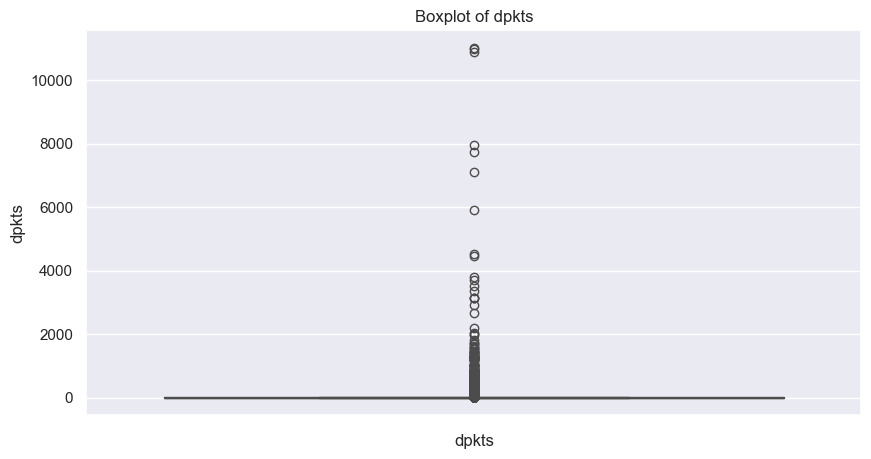

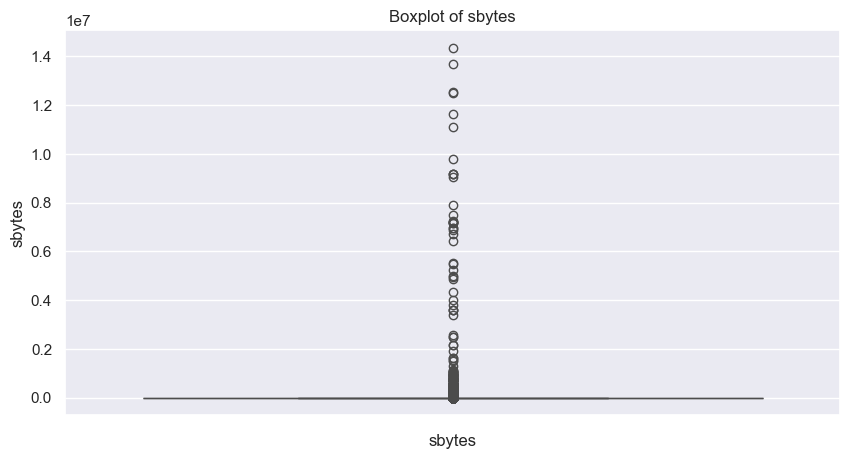

In [19]:
# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for column in numerical_columns[:5]:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

# Display the boxplots
plt.show()

# **REMOVING OUTLIERS**

In [20]:
# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Iterate over each numerical column and remove outliers
for column in numerical_columns:
    remove_outliers_iqr(column)

# **BOXPLOT**

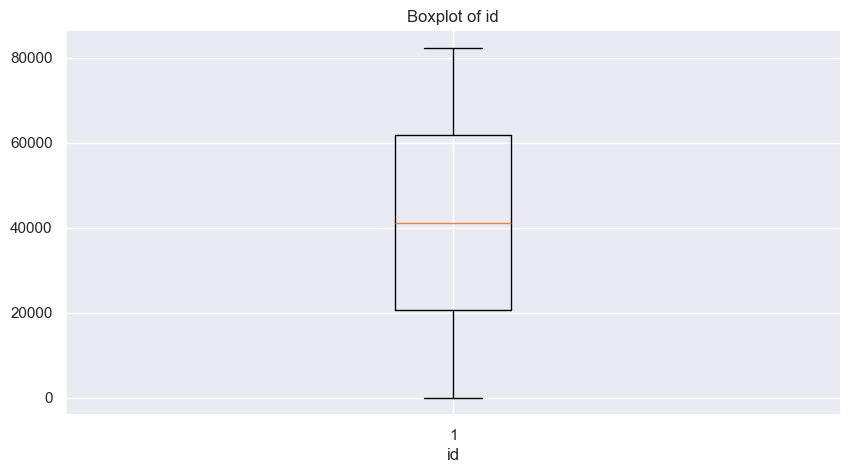

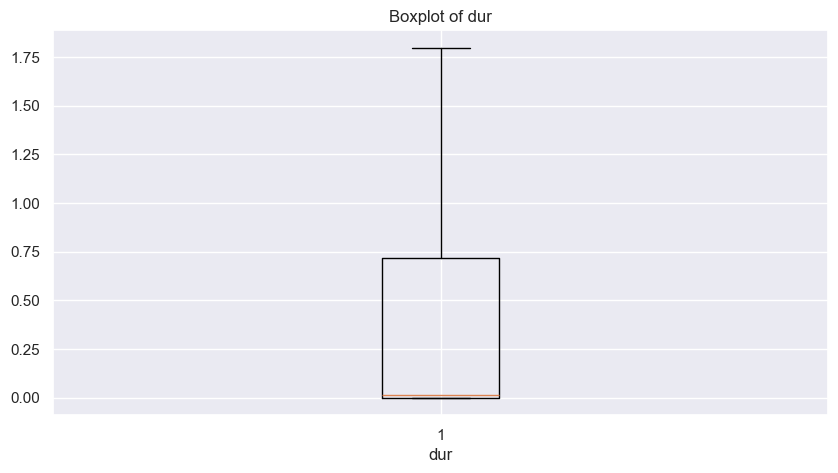

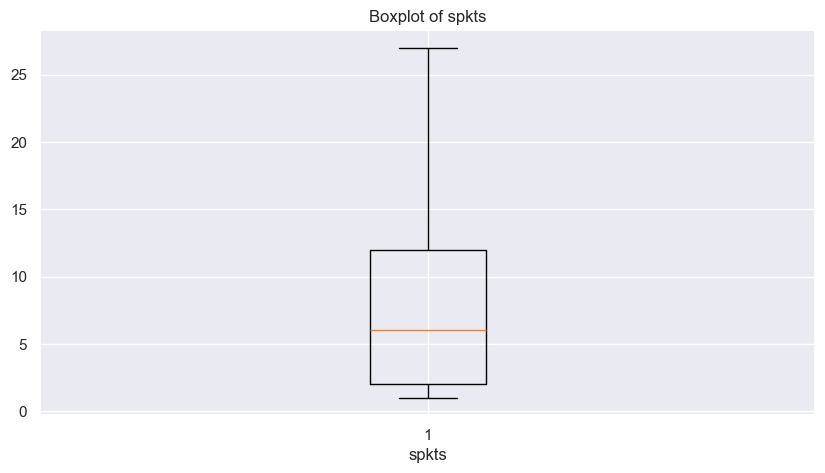

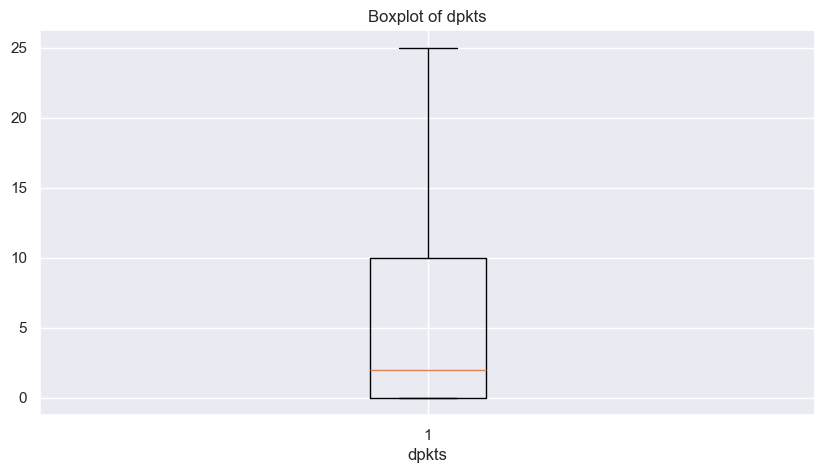

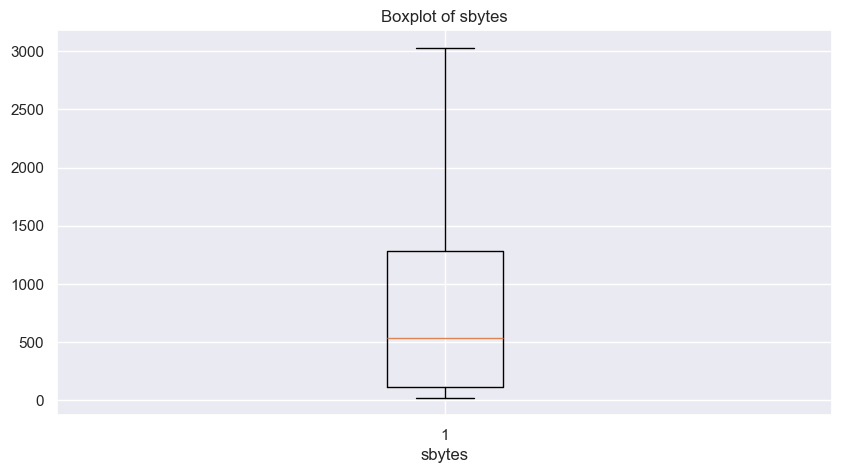

In [21]:
# Assuming you have a DataFrame named 'df' containing your data

# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for column in numerical_columns[:5]:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

# Display the boxplots
plt.show()

# **JOINTPLOT**

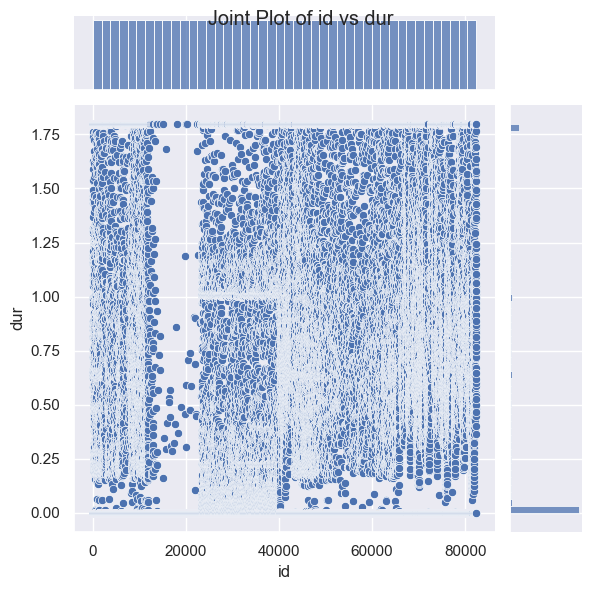

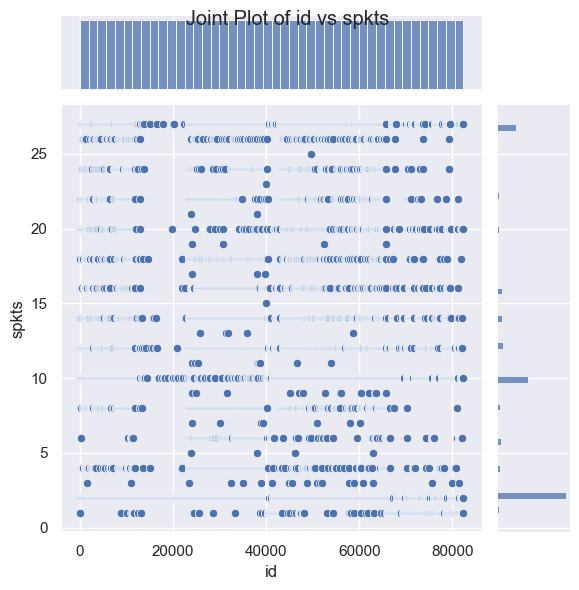

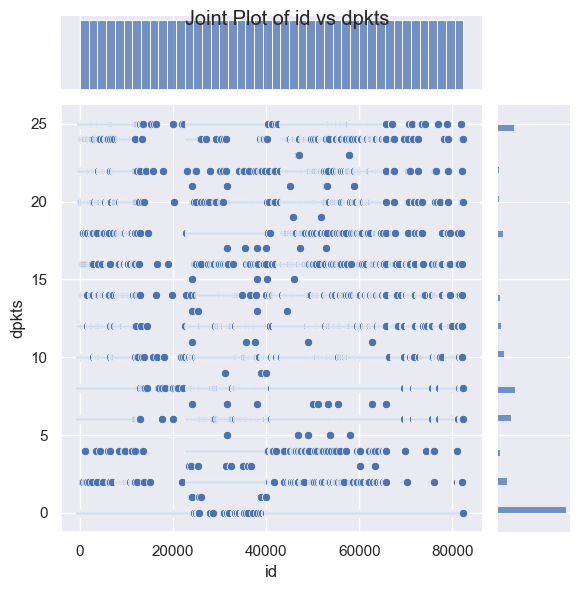

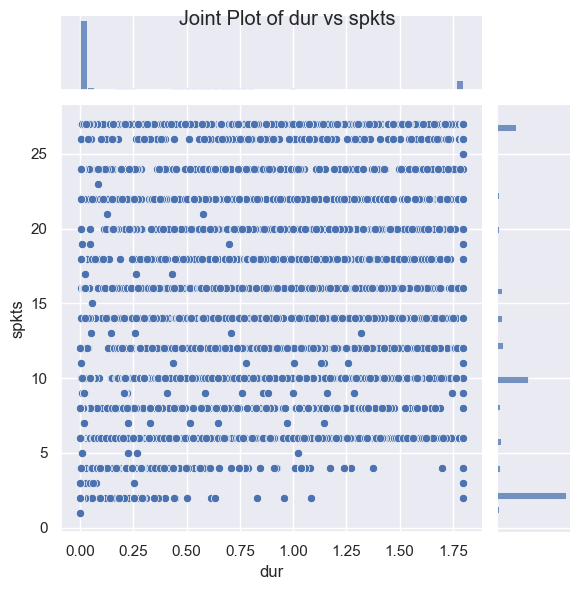

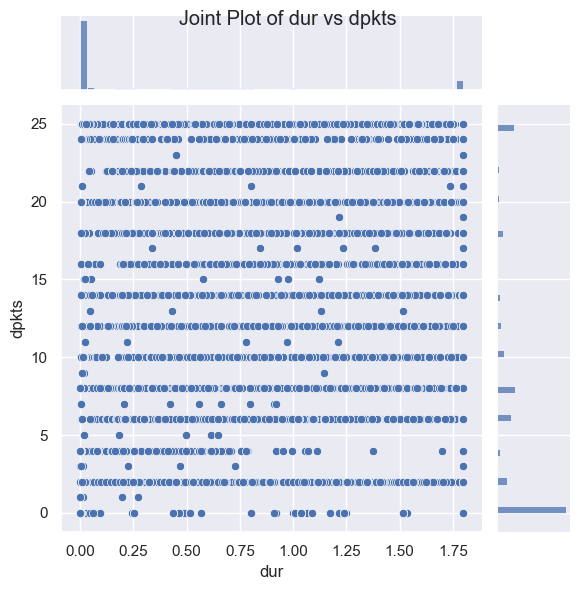

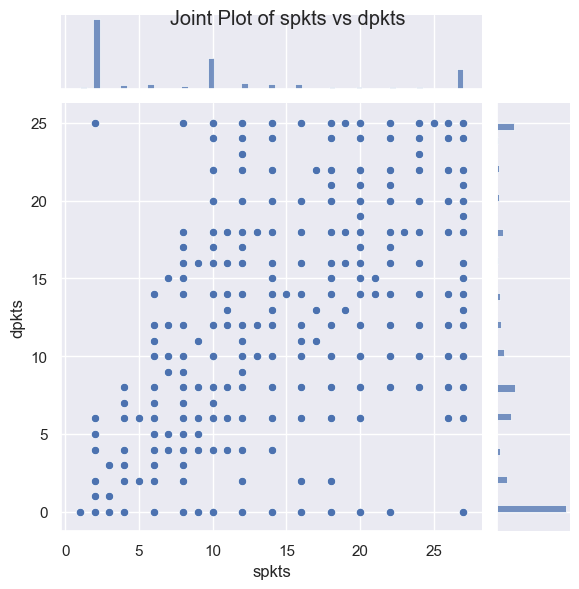

In [22]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create joint plots for each pair of numerical columns
for i in range(min(len(numerical_columns), 4)):  # Considering only the first five columns
    for j in range(i + 1, min(len(numerical_columns), 4)):  # Considering only the first five columns
        volume = numerical_columns[i]
        available_supply = numerical_columns[j]
        sns.jointplot(data=df, x=volume, y=available_supply, kind='scatter')
        plt.suptitle(f"Joint Plot of {volume} vs {available_supply}")
        plt.show()

In [23]:
df.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ... ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                1             2.0             0   
1  125000.0003  ...                1             2.0             0   
2  200000.0051  ...                1             3.0             0   
3  166666.6608  ...                1             3.0             0   
4  100000.0025  ...                1             3.0             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1         2.0                0   
1           0                 0           1         2.0                0   
2           0                 0           1         3.0                0   
3           0                 0           2         3.0                0   
4           0                 0           2         3.0                0   

   attack_cat  label  
0      Normal      0  
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  

[5 rows x 45 columns]

In [24]:
df['attack_cat'].value_counts()

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

In [25]:
df.replace({'Normal':0,'Generic':1,'Exploits':1,'Fuzzers':1,'DoS':1,'Reconnaissance':1,'Analysis':1,'Backdoor':1,'Shellcode':1,'Worms':1},inplace=True)

C:\Users\076\AppData\Local\Temp\ipykernel_11204\4084347340.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Normal':0,'Generic':1,'Exploits':1,'Fuzzers':1,'DoS':1,'Reconnaissance':1,'Analysis':1,'Backdoor':1,'Shellcode':1,'Worms':1},inplace=True)


In [26]:
df['attack_cat'].value_counts()

attack_cat
1    45332
0    37000
Name: count, dtype: int64

In [27]:
df['service'].replace('-',np.NaN,inplace=True)
df['service'].value_counts().sum()

C:\Users\076\AppData\Local\Temp\ipykernel_11204\413103140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['service'].replace('-',np.NaN,inplace=True)


35179

In [28]:
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean)

In [29]:
df

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp     dns   INT      2      0     496       0   
1          2  0.000008   udp     dns   INT      2      0    1762       0   
2          3  0.000005   udp     dns   INT      2      0    1068       0   
3          4  0.000006   udp     dns   INT      2      0     900       0   
4          5  0.000010   udp     dns   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp     dns   INT      2      0     104       0   
82328  82329  1.106101   tcp     dns   FIN     20      8    3029     354   
82329  82330  0.000000   arp     dns   INT      1      0      46       0   
82330  82331  0.000000   arp     dns   INT      1      0      46       0   
82331  82332  0.000009   udp     dns   INT      2      0     104       0   

                rate  ... ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0       90909.090200  ...                1             2.0             0   
1      125000.000300  ...                1             2.0             0   
2      200000.005100  ...                1             3.0             0   
3      166666.660800  ...                1             3.0             0   
4      100000.002500  ...                1             3.0             0   
...              ...  ...              ...             ...           ...   
82327  200000.005100  ...                1             2.0             0   
82328      24.410067  ...                1             1.0             0   
82329       0.000000  ...                1             1.0             0   
82330       0.000000  ...                1             1.0             0   
82331  111111.107200  ...                1             1.0             0   

       ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0               0                 0           1         2.0                0   
1               0                 0           1         2.0                0   
2               0                 0           1         3.0                0   
3               0                 0           2         3.0                0   
4               0                 0           2         3.0                0   
...           ...               ...         ...         ...              ...   
82327           0                 0           2         1.0                0   
82328           0                 0           3         2.0                0   
82329           0                 0           1         1.0                0   
82330           0                 0           1         1.0                0   
82331           0                 0           1         1.0                0   

       attack_cat  label  
0               0      0  
1               0      0  
2               0      0  
3               0      0  
4               0      0  
...           ...    ...  
82327           0      0  
82328           0      0  
82329           0      0  
82330           0      0  
82331           0      0  

[82332 rows x 45 columns]

In [30]:
le=LabelEncoder()
print(le)
df = df.astype(str)
df = df.apply(LabelEncoder().fit_transform)
df.head()

LabelEncoder()


id    dur  proto  service  state  spkts  dpkts  sbytes  dbytes   rate  \
0      0  31241    117        1      4     11      0    1093       0  40100   
1  11111  35363    117        1      4     11      0     421       0   3426   
2  22222  35359    117        1      4     11      0      37       0  12909   
3  33333  35360    117        1      4     11      0    1319       0   8121   
4  44444  35328    117        1      4     11      0     610       0   1119   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 0               6             0           0   
1  ...                 0               6             0           0   
2  ...                 0               7             0           0   
3  ...                 0               7             0           0   
4  ...                 0               7             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           0          11                0           0   
1                 0           0          11                0           0   
2                 0           0          18                0           0   
3                 0           8          18                0           0   
4                 0           8          18                0           0   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

In [31]:
df.head()

id    dur  proto  service  state  spkts  dpkts  sbytes  dbytes   rate  \
0      0  31241    117        1      4     11      0    1093       0  40100   
1  11111  35363    117        1      4     11      0     421       0   3426   
2  22222  35359    117        1      4     11      0      37       0  12909   
3  33333  35360    117        1      4     11      0    1319       0   8121   
4  44444  35328    117        1      4     11      0     610       0   1119   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 0               6             0           0   
1  ...                 0               6             0           0   
2  ...                 0               7             0           0   
3  ...                 0               7             0           0   
4  ...                 0               7             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           0          11                0           0   
1                 0           0          11                0           0   
2                 0           0          18                0           0   
3                 0           8          18                0           0   
4                 0           8          18                0           0   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

In [32]:
df.to_csv('final.csv')

In [33]:
df['attack_cat'].value_counts()

attack_cat
1    45332
0    37000
Name: count, dtype: int64

In [34]:
x = df.drop(['attack_cat'],axis=1)
y = df['attack_cat']

In [35]:
x

id    dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0          0  31241    117        1      4     11      0    1093       0   
1      11111  35363    117        1      4     11      0     421       0   
2      22222  35359    117        1      4     11      0      37       0   
3      33333  35360    117        1      4     11      0    1319       0   
4      44444  35328    117        1      4     11      0     610       0   
...      ...    ...    ...      ...    ...    ...    ...     ...     ...   
82327  80366  35359    117        1      4     11      0      22       0   
82328  80367  29923    111        1      3     12     24    1001     720   
82329  80369      0      6        1      4      0      0    1075       0   
82330  80370      0      6        1      4      0      0    1075       0   
82331  80371  35364    117        1      4     11      0      22       0   

        rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0      40100  ...                 0                 0               6   
1       3426  ...                 0                 0               6   
2      12909  ...                 0                 0               7   
3       8121  ...                 1                 0               7   
4       1119  ...                 1                 0               7   
...      ...  ...               ...               ...             ...   
82327  12909  ...                 0                 0               6   
82328  16611  ...                 0                 0               0   
82329      0  ...                 0                 0               0   
82330      0  ...                 0                 0               0   
82331   2222  ...                 0                 0               0   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0                 0           0                 0           0          11   
1                 0           0                 0           0          11   
2                 0           0                 0           0          18   
3                 0           0                 0           8          18   
4                 0           0                 0           8          18   
...             ...         ...               ...         ...         ...   
82327             0           0                 0           8           0   
82328             0           0                 0           9          11   
82329             0           0                 0           0           0   
82330             0           0                 0           0           0   
82331             0           0                 0           0           0   

       is_sm_ips_ports  label  
0                    0      0  
1                    0      0  
2                    0      0  
3                    0      0  
4                    0      0  
...                ...    ...  
82327                0      0  
82328                0      0  
82329                0      0  
82330                0      0  
82331                0      0  

[82332 rows x 44 columns]

In [36]:
y

0        0
1        0
2        0
3        0
4        0
        ..
82327    0
82328    0
82329    0
82330    0
82331    0
Name: attack_cat, Length: 82332, dtype: int32

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [38]:
x_train

id    dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
519    46668  34190    111        4      3     19     18     976     698   
9536   81819  35324    111        8      2     19     18    1001     698   
75180  72425  35349    111        1      5     11      0    1318       0   
60163  55740  35339     51        1      4     11      0    1294       0   
8737   80931  35324     77        1      4     19      0    1001       0   
...      ...    ...    ...      ...    ...    ...    ...     ...     ...   
6265   58512  10777    111        4      3      1     24    1256     698   
54886  49875  35324    111        4      3     19     18    1001     698   
76820  74247  15616    111        1      3      1     22    1112     705   
860    80789  31380    111        4      3      1     24    1228     720   
15795   6441  35349    117        1      4     11      0      76       0   

        rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
519    19320  ...                 0                 0               0   
9536   12956  ...                 1                 0               0   
75180  20502  ...                 0                 0              10   
60163  20502  ...                 1                 1               6   
8737     349  ...                 0                 0               0   
...      ...  ...               ...               ...             ...   
6265   34897  ...                 0                 0               0   
54886  40313  ...                 0                 0               0   
76820  23090  ...                 0                 0               8   
860     4620  ...                 0                 0               0   
15795  20502  ...                 8                 5               5   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
519               0           0                 0           8           0   
9536              0           0                 0           9           0   
75180             0           0                 0          10          21   
60163             0           0                 0          11          11   
8737              0           0                 0           8           0   
...             ...         ...               ...         ...         ...   
6265              0           0                 0          12           0   
54886             0           0                 0           8           0   
76820             0           0                 0           0          19   
860               0           0                 0           0           0   
15795             0           0                 0           7          17   

       is_sm_ips_ports  label  
519                  0      1  
9536                 0      1  
75180                0      0  
60163                0      1  
8737                 0      1  
...                ...    ...  
6265                 0      1  
54886                0      1  
76820                0      0  
860                  0      1  
15795                0      1  

[57632 rows x 44 columns]

In [39]:
x_train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpin', 'b', 'dtcpb',
       'dwtcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [40]:
y_train

519      1
9536     1
75180    0
60163    1
8737     1
        ..
6265     1
54886    1
76820    0
860      1
15795    1
Name: attack_cat, Length: 57632, dtype: int32

# **Model building**

Here is the accuracy score of the KNN model: 0.9544534412955465
Here is the train accuracy score of the KNN model: 0.9695828706274292
Here is the classification report of the KNN model:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11147
           1       0.97      0.95      0.96     13553

    accuracy                           0.95     24700
   macro avg       0.95      0.96      0.95     24700
weighted avg       0.95      0.95      0.95     24700

Here is the confusion matrix of the KNN model:

[[10763   384]
 [  741 12812]]
Here is the AUC score of the KNN model: 0.9554385137672844


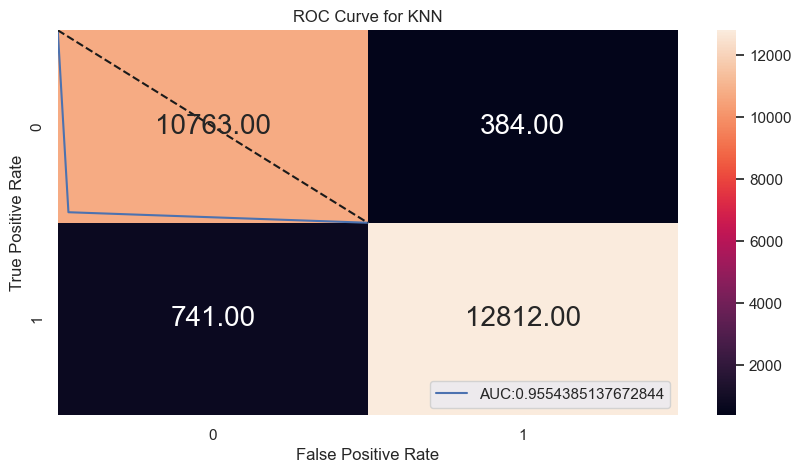

In [41]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Creating a KNN classifier
knn = KNeighborsClassifier()

# Fitting the model on the training data
knn.fit(x_train, y_train)

# Predicting the values for the test data
y_pred = knn.predict(x_test)

# Printing the accuracy score of the model
print(f'Here is the accuracy score of the KNN model: {accuracy_score(y_test, y_pred)}')
acc_knn = accuracy_score(y_test, y_pred)

# Getting the train accuracy
y_pred_train = knn.predict(x_train)
print(f'Here is the train accuracy score of the KNN model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the model
print(f'Here is the classification report of the KNN model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix
print(f'Here is the confusion matrix of the KNN model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', annot_kws={'size': 20})

# Printing the AUC score of the model
print(f'Here is the AUC score of the KNN model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

Here is the accuracy score of the LDA model: 0.8960323886639676
Here is the train accuracy score of the LDA model: 0.8947980288728484
Here is the classification report of the LDA model:

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     11147
           1       0.90      0.91      0.91     13553

    accuracy                           0.90     24700
   macro avg       0.90      0.89      0.89     24700
weighted avg       0.90      0.90      0.90     24700

Here is the confusion matrix of the LDA model:

[[ 9817  1330]
 [ 1238 12315]]
Here is the AUC score of the LDA model: 0.8946701482772585


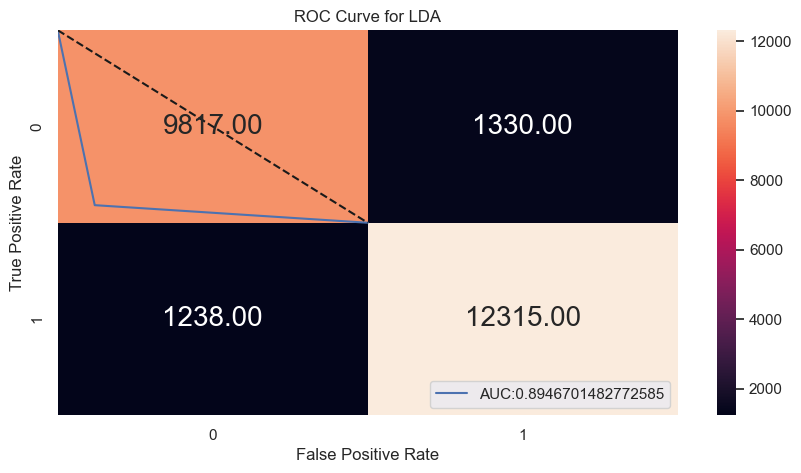

In [42]:
# Importing necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Creating an LDA classifier
lda = LinearDiscriminantAnalysis()

# Fitting the model on the training data
lda.fit(x_train, y_train)

# Predicting the values for the test data
y_pred = lda.predict(x_test)

# Printing the accuracy score of the model
print(f'Here is the accuracy score of the LDA model: {accuracy_score(y_test, y_pred)}')
acc_lda = accuracy_score(y_test, y_pred)

# Getting the train accuracy
y_pred_train = lda.predict(x_train)
print(f'Here is the train accuracy score of the LDA model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the model
print(f'Here is the classification report of the LDA model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix
print(f'Here is the confusion matrix of the LDA model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', annot_kws={'size': 20})

# Printing the AUC score of the model
print(f'Here is the AUC score of the LDA model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA')
plt.legend(loc='lower right')
plt.show()

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Here is the accuracy score of the logistic regression model: 0.7995141700404859
Here is the train accuracy score of the logistic regression model: 0.8012215435868961
Here is the classification report of the logistic regression model:

              precision    recall  f1-score   support

           0       0.79      0.76      0.77     11147
           1       0.81      0.83      0.82     13553

    accuracy                           0.80     24700
   macro avg       0.80      0.80      0.80     24700
weighted avg       0.80      0.80      0.80     24700

Here is the confusion matrix of the logistic regression model:

[[ 8484  2663]
 [ 2289 11264]]
Here is the AUC score of the logistic regression model: 0.7961045727854994


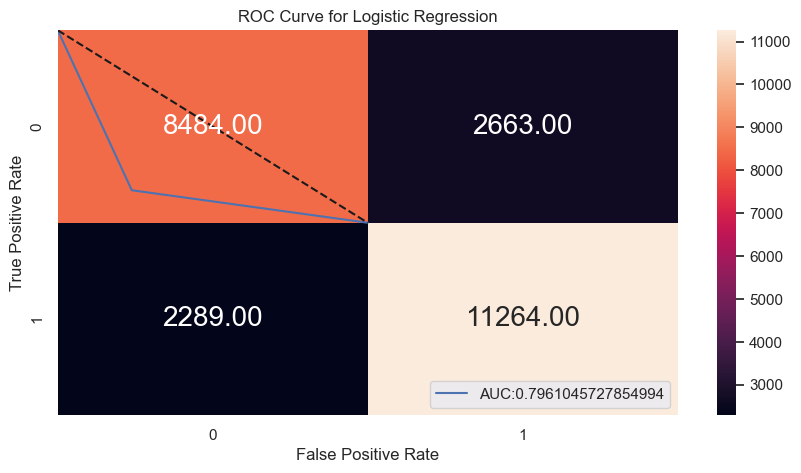

In [43]:
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression classifier
logreg = LogisticRegression()

# Fitting the model on the training data
logreg.fit(x_train, y_train)

# Predicting the values for the test data
y_pred = logreg.predict(x_test)

# Printing the accuracy score of the model
print(f'Here is the accuracy score of the logistic regression model: {accuracy_score(y_test, y_pred)}')
acc_logreg = accuracy_score(y_test, y_pred)

# Getting the train accuracy
y_pred_train = logreg.predict(x_train)
print(f'Here is the train accuracy score of the logistic regression model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the model
print(f'Here is the classification report of the logistic regression model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix
print(f'Here is the confusion matrix of the logistic regression model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', annot_kws={'size': 20})

# Printing the AUC score of the model
print(f'Here is the AUC score of the logistic regression model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# $$Applying     k-best Feature     selection$$

1 .K-best feature selection is applied to select a subset of the most relevant features from a larger set of features in a dataset. This is done in order to reduce the complexity of the model, improve its accuracy and speed up the training process, while avoiding overfitting.

2 .Overfitting refers to the situation where the machine learning model performs well on the training data, but poorly on new, unseen data. This can happen when the model is too complex and includes irrelevant features that are not generalized by the model, leading to a poor fit to the new data. K-best feature selection tries to address this problem by selecting only the most relevant features for the model, discarding the less relevant ones, and preventing the model from fitting to noise in the data.

3 .By selecting only the k best features, where k is chosen based on experimentation and domain knowledge, the model becomes simpler, easier to interpret, and less prone to overfitting due to high dimensionality. K-best feature selection can be performed using statistical techniques, such as ANOVA F-value for classification, or mutual information for regression, among others. Different feature selection techniques have their own strengths and weaknesses, depending on the specific problem.

In [44]:
df=pd.read_csv('basic iot network dataset.csv')
df.head()

C:\Users\076\AppData\Local\Temp\ipykernel_11204\1009690241.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('basic iot network dataset.csv')


id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ... ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                1               2             0   
1  125000.0003  ...                1               2             0   
2  200000.0051  ...                1               3             0   
3  166666.6608  ...                1               3             0   
4  100000.0025  ...                1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   

   attack_cat  label  
0      Normal      0  
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  

[5 rows x 45 columns]

In [45]:
df.replace({'Normal':0,'Generic':1,'Exploits':1,'Fuzzers':1,'DoS':1,'Reconnaissance':1,'Analysis':1,'Backdoor':1,'Shellcode':1,'Worms':1},inplace=True)
df['attack_cat'].value_counts()
df['service'].replace('-',np.NaN,inplace=True)
df['service'].value_counts().sum()
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean)
le=LabelEncoder()
print(le)
df = df.astype(str)
df = df.apply(LabelEncoder().fit_transform)
df.head()

C:\Users\076\AppData\Local\Temp\ipykernel_11204\3479288140.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Normal':0,'Generic':1,'Exploits':1,'Fuzzers':1,'DoS':1,'Reconnaissance':1,'Analysis':1,'Backdoor':1,'Shellcode':1,'Worms':1},inplace=True)
C:\Users\076\AppData\Local\Temp\ipykernel_11204\3479288140.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(val

LabelEncoder()


id    dur  proto  service  state  spkts  dpkts  sbytes  dbytes   rate  \
0      0  31241    117        1      4     89      0    3295       0  40102   
1  11111  39818    117        1      4     89      0     947       0   3427   
2  22222  39499    117        1      4     89      0      76       0  12910   
3  33333  39622    117        1      4     89      0    4286       0   8122   
4  44444  36336    117        1      4     89      0    1352       0   1119   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 0              11             0           0   
1  ...                 0              11             0           0   
2  ...                 0              22             0           0   
3  ...                 0              22             0           0   
4  ...                 0              22             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           0          11                0           0   
1                 0           0          11                0           0   
2                 0           0          22                0           0   
3                 0          11          22                0           0   
4                 0          11          22                0           0   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

In [46]:
X=df.drop('attack_cat',axis=1)
y=df['attack_cat']
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 101, test_size = 0.3)

In [47]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

label                0.695939
ct_state_ttl         0.278910
sttl                 0.198953
dttl                 0.195895
state                0.191733
ct_dst_sport_ltm     0.176017
dur                  0.125265
dpkts                0.112574
dload                0.110562
proto                0.099454
swin                 0.094696
dmean                0.089454
spkts                0.088682
ct_src_dport_ltm     0.087962
dbytes               0.079945
dtcpb                0.070776
sbytes               0.062908
dloss                0.046085
sjit                 0.044359
sloss                0.043256
id                   0.040768
smean                0.038720
b                    0.036135
stcpin               0.035163
djit                 0.034363
ct_srv_dst           0.023208
sinpkt               0.018102
dwtcprtt             0.017714
synack               0.017505
ackdat               0.016915
ct_srv_src           0.012109
rate                 0.011183
dinpkt               0.007958
ct_dst_src

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.03985214, 0.12628051, 0.10316309, 0.00664132, 0.19194454,
       0.08558101, 0.11554027, 0.06325675, 0.07853723, 0.0102981 ,
       0.19881292, 0.19617591, 0.00331176, 0.11285498, 0.04437992,
       0.04428578, 0.01689531, 0.01051667, 0.04632204, 0.03410901,
       0.09779095, 0.03571847, 0.03872367, 0.0767727 , 0.01988588,
       0.01531961, 0.01337292, 0.03799977, 0.09247528, 0.00195814,
       0.0018915 , 0.01516622, 0.27774824, 0.00633904, 0.08952555,
       0.17642585, 0.00405677, 0.        , 0.00223897, 0.        ,
       0.00668102, 0.0234886 , 0.        , 0.69592115])

In [ ]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['dur', 'proto', 'state', 'dpkts', 'sttl', 'dttl', 'dload',
       'ct_state_ttl', 'ct_dst_sport_ltm', 'label'],
      dtype='object')

In [ ]:
# Define the list of columns you want to select
columns_to_select =['id', 'dur', 'sbytes', 'rate', 'dttl', 'sload', 'dinpkt', 'smean',
       'ct_state_ttl', 'label']

# Create a new DataFrame with the selected columns
df1 = df[columns_to_select].copy()
df1.head()

id    dur  sbytes   rate  dttl  sload  dinpkt  smean  ct_state_ttl  \
0      0  31241    3295  40102     0  10378       0    494             2   
1  11111  39818     947   3427     0  40523       0   1161             2   
2  22222  39499      76  12910     0  39873       0    789             2   
3  33333  39622    4286   8122     0  31567       0    700             2   
4  44444  36336    1352   1119     0  39772       0     65             2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [ ]:
from sklearn.cluster import KMeans
dist_df = []
sse = []
for num_clust in range(1, 10):
  km  = KMeans(n_clusters=num_clust)
  km.fit(df1)
  dist_df.append([num_clust, km.inertia_])

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

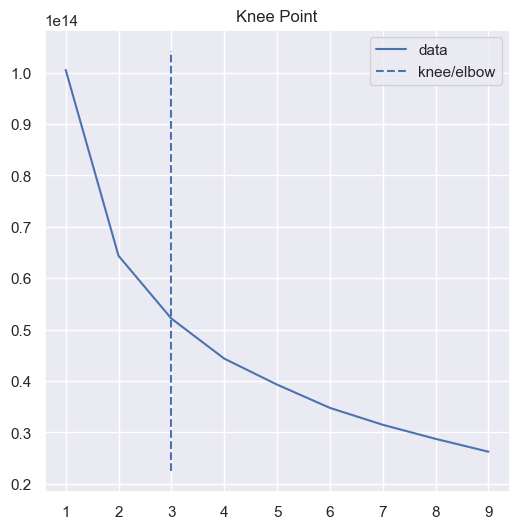

In [ ]:
dist_df = pd.DataFrame(dist_df, columns=['num_of_cluster', 'distance'])
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), dist_df['distance'], curve="convex", direction="decreasing")
kl.elbow

kl.plot_knee()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df1)
y_pred = kmeans.predict(df1)
df1['attack_cat'] = y_pred
df1['attack_cat'].value_counts()

NameError: name 'KMeans' is not defined

In [ ]:
df1.head()

id    dur  sbytes   rate  dttl  sload  dinpkt  smean  ct_state_ttl  \
0      0  31241    3295  40102     0  10378       0    494             2   
1  11111  39818     947   3427     0  40523       0   1161             2   
2  22222  39499      76  12910     0  39873       0    789             2   
3  33333  39622    4286   8122     0  31567       0    700             2   
4  44444  36336    1352   1119     0  39772       0     65             2   

   label  attack_cat  
0      0           0  
1      0           0  
2      0           0  
3      0           0  
4      0           1

In [ ]:
df1.to_csv('test.csv')

NameError: name 'df1' is not defined

In [ ]:
X=df1.drop('attack_cat',axis=1)
y=df1['attack_cat']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 101, test_size = 0.3)

In [ ]:
X_train

id    dur  sbytes   rate  dttl  sload  dinpkt  smean  ct_state_ttl  \
682    64778  39818    1244   3427     0      4       0      0             2   
7473   71934  38879    1244  25098     0  16107       0      0             2   
35061  27849  39369    2860     32     0  27606       0    900             0   
66842  63160  39887      49   2223     0  25503       0    773             2   
55274  50307  22396    4321  12294     1  40824   12602   1202             1   
...      ...    ...     ...    ...   ...    ...     ...    ...           ...   
55293  50328  39214     182  18256     0   2718       0    825             2   
49751  44170  39818    1244   1120     0  38518       0      0             2   
5695   52178  16213    1645  24780     1  20090   28816    488             1   
73542  70605  35285    4071   5841     1  19359   14762    742             1   
45919  39913  38301     382   4902     1  18654   13863    784             1   

       label  
682        1  
7473       1  
35061      0  
66842      0  
55274      1  
...      ...  
55293      1  
49751      1  
5695       1  
73542      0  
45919      1  

[57632 rows x 10 columns]

In [ ]:
X_train.to_csv('finaldata___1.csv')

In [ ]:
y_train

682      1
7473     1
35061    0
66842    1
55274    1
        ..
55293    1
49751    1
5695     1
73542    1
45919    1
Name: attack_cat, Length: 57632, dtype: int32

# **Model Building**

# **KNeighborsClassifier**

Best parameters found:
 {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
0.991 (+/-0.001) for {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
0.991 (+/-0.001) for {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Here is the accuracy score of the tuned KNN model: 0.9930364372469636
Here is the train accuracy score of the tuned KNN model: 0.9967552748473071
Here is the classification report of the tuned KNN model:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11869
           1       0.99      0.99      0.99     12831

    accuracy                           0.99     24700
   macro avg       0.99      0.99      0.99     24700
weighted avg       0.99      0.99      0.99     24700

Here is the confusion matrix of the tuned KNN model:

[[11782    87]
 [   85 12746]]


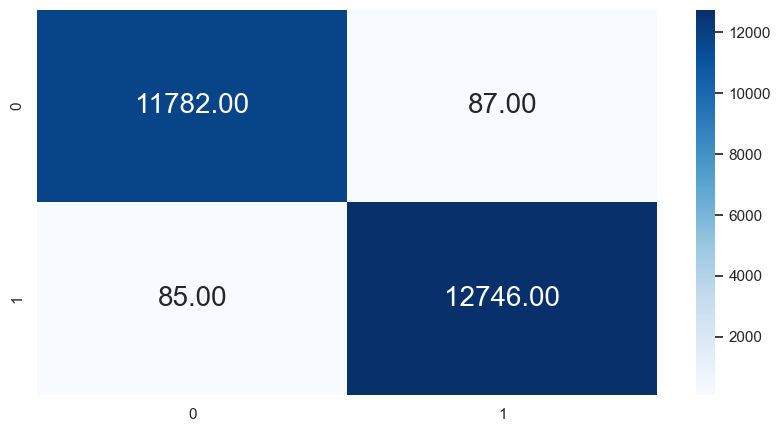

Here is the AUC score of the tuned KNN model: 0.9930226997645608


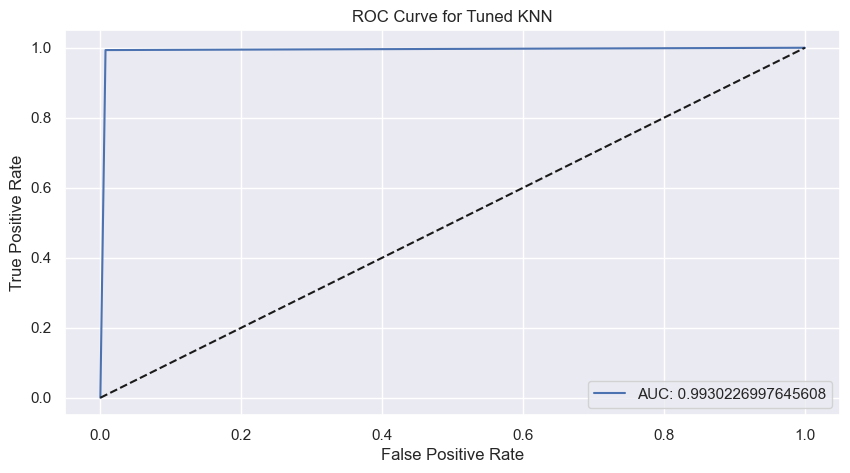

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined

# Defining the parameter space for GridSearchCV
parameter_space = {
    'n_neighbors': [3, 5],  # You can adjust the range as needed
    'weights': ['uniform'],
    'algorithm': ['auto']
}

# Creating the KNN classifier
knn = KNeighborsClassifier()

# Creating the GridSearchCV object
clf = GridSearchCV(knn, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Predicting the values for the test data with the best estimator
y_pred = clf.predict(X_test)

# Printing the accuracy score of the tuned model
print(f'Here is the accuracy score of the tuned KNN model: {accuracy_score(y_test, y_pred)}')

# Getting the train accuracy for the tuned model
y_pred_train = clf.predict(X_train)
print(f'Here is the train accuracy score of the tuned KNN model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the tuned model
print(f'Here is the classification report of the tuned KNN model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix of the tuned model
print(f'Here is the confusion matrix of the tuned KNN model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix for the tuned model
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', cmap="Blues", annot_kws={'size': 20})
plt.show()

# Printing the AUC score of the tuned model
print(f'Here is the AUC score of the tuned KNN model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the tuned model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned KNN')
plt.legend(loc='lower right')
plt.show()

# **LinearDiscriminantAnalysis**

c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Python311\Lib\site-packages\sklearn\model_

Best parameters found:
 {'priors': None, 'shrinkage': None, 'solver': 'svd'}
0.966 (+/-0.004) for {'priors': None, 'shrinkage': None, 'solver': 'svd'}
nan (+/-nan) for {'priors': None, 'shrinkage': 'auto', 'solver': 'svd'}
Here is the accuracy score of the tuned LDA model: 0.9653846153846154
Here is the train accuracy score of the tuned LDA model: 0.9660258189894503
Here is the classification report of the tuned LDA model:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11869
           1       0.94      1.00      0.97     12831

    accuracy                           0.97     24700
   macro avg       0.97      0.96      0.97     24700
weighted avg       0.97      0.97      0.97     24700

Here is the confusion matrix of the tuned LDA model:

[[11017   852]
 [    3 12828]]


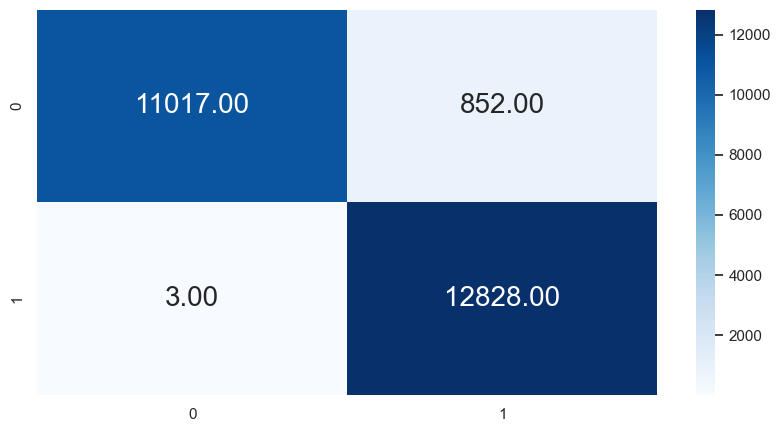

Here is the AUC score of the tuned LDA model: 0.9639912766034273


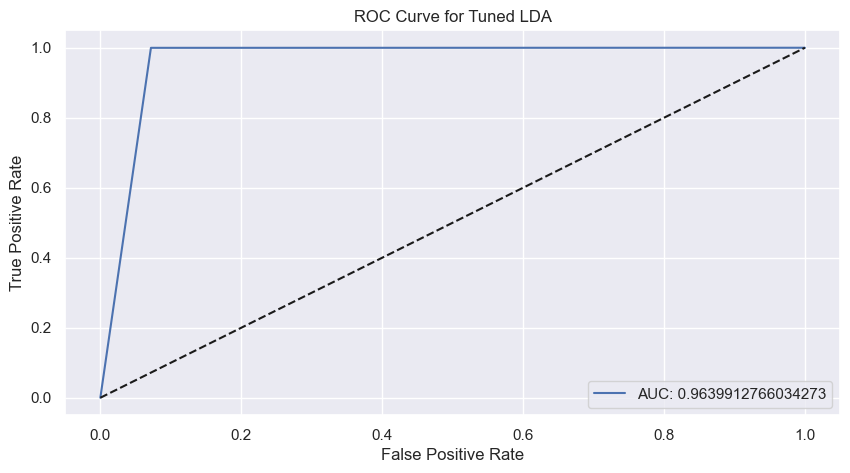

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined

# Defining the parameter space for GridSearchCV
parameter_space = {
    'solver': ['svd'],
    'shrinkage': [None, 'auto'],
    'priors': [None]
}

# Creating the LDA classifier
lda = LinearDiscriminantAnalysis()

# Creating the GridSearchCV object
clf = GridSearchCV(lda, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Predicting the values for the test data with the best estimator
y_pred = clf.predict(X_test)

# Printing the accuracy score of the tuned model
print(f'Here is the accuracy score of the tuned LDA model: {accuracy_score(y_test, y_pred)}')

# Getting the train accuracy for the tuned model
y_pred_train = clf.predict(X_train)
print(f'Here is the train accuracy score of the tuned LDA model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the tuned model
print(f'Here is the classification report of the tuned LDA model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix of the tuned model
print(f'Here is the confusion matrix of the tuned LDA model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix for the tuned model
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', cmap="Blues", annot_kws={'size': 20})
plt.show()
# Printing the AUC score of the tuned model
print(f'Here is the AUC score of the tuned LDA model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the tuned model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned LDA')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Defining the parameter space for GridSearchCV
parameter_space = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Creating the logistic regression classifier
logreg = LogisticRegression()

# Creating the GridSearchCV object
clf = GridSearchCV(logreg, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Predicting the values for the test data with the best estimator
y_pred = clf.predict(X_test)

# Printing the accuracy score of the tuned model
print(f'Here is the accuracy score of the tuned logistic regression model: {accuracy_score(y_test, y_pred)}')

# Getting the train accuracy for the tuned model
y_pred_train = clf.predict(X_train)
print(f'Here is the train accuracy score of the tuned logistic regression model: {accuracy_score(y_train, y_pred_train)}')

# Printing the classification report of the tuned model
print(f'Here is the classification report of the tuned logistic regression model:\n\n{classification_report(y_test, y_pred)}')

# Printing the confusion matrix of the tuned model
print(f'Here is the confusion matrix of the tuned logistic regression model:\n\n{confusion_matrix(y_test, y_pred)}')

# Plotting the confusion matrix for the tuned model
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.2f', cmap="Blues", annot_kws={'size': 20})
plt.show()

# Printing the AUC score of the tuned model
print(f'Here is the AUC score of the tuned logistic regression model: {roc_auc_score(y_test, y_pred)}')

# Plotting the ROC curve for the tuned model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# **Prediction**

In [ ]:
abc=[64778,	39818,	1244,	3427,	0,	4	,0	,0,	2,	1]
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
result=logreg.predict([abc])
result=result[0]
if result==0:
    print("Normal")
else:
    print("Attacked")

Normal


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
abc=[27849,	39369,	2860,	32,	0,	27606,	0	,900,	0,	0]
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
result=logreg.predict([abc])
result=result[0]
if result==0:
    print("Normal")
else:
    print("Attacked")

Attacked


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# $$THE-END$$